***Notebook* para coleta do twitter e criação de wordclouds**.

In [ ]:
# wordcloud: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
# Tweepy: https://docs.tweepy.org/en/v4.10.0/


In [ ]:
! pip install tweepy==4.10.0 pandas

In [11]:
import tweepy
import csv
import json
import pandas as pd
import os
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import re

In [3]:
access_token = "1400895473389555716-68Cmo5V4I5oyVkoG2OClLunwbcpMZi"
access_token_secret = "i1tKGavHC5Nj0TaAptv8UBLDgTjMUaVHOXmB1xiC9dgOd"
consumer_key = "KVcLaueo5lqxfTt7ZHjik6tEa"
consumer_secret = "DjdHgEuA4lT5nOq4gwZEd3RrkxN7lyNInsUaQ4DWvqkuA2Oq0A"
bearer_token = "AAAAAAAAAAAAAAAAAAAAAEeOQQEAAAAA9T8aDYPek7lSfYVe6F4WerqICBg%3DY1fWmANkCv4FposOpgrAYdoZbqeuHNxONFMNZE3QQuAe9GKwsz"

In [4]:
auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.Client(bearer_token=bearer_token, consumer_key=consumer_key, consumer_secret=consumer_secret, access_token=access_token, access_token_secret=access_token_secret)

In [7]:
query_twitter = "from:jairbolsonaro (Decreto OR quarentena) lang:pt -is:retweet"

start_time = '2020-01-01T00:00:00Z'
end_time = '2023-06-01T00:00:00Z'

tweet_fields=['created_at','author_id','text', 'public_metrics']

response = api.search_all_tweets(query=query_twitter, tweet_fields=tweet_fields, max_results=500, start_time=start_time, end_time=end_time)

In [12]:
listTweets = list()

try:
  count = 0
  for tweet in response.data:
    count = count+1
    setTweetData = {
          'created_at': tweet.created_at,
          'author_id': tweet.author_id,
          'text': tweet.text,
          'metrics': tweet.data
      }
    listTweets.append(setTweetData)
except:
  pass

politicos_df = pd.DataFrame(listTweets)

politicos_df['created_at'] = politicos_df['created_at'].dt.tz_localize(None)
politicos_df['author_id'] = politicos_df['author_id'].astype(object)
politicos_df

,created_at,author_id,text,metrics
0,2023-05-27 13:30:06,128372940,- GASTOS ESTRANGEIROS NO BRASIL CRESCERAM 84% ...,"{'created_at': '2023-05-27T13:30:06.000Z', 'au..."
1,2023-05-26 11:27:14,128372940,- Seguiu avançando com o apoio inédito do Gove...,"{'created_at': '2023-05-26T11:27:14.000Z', 'au..."
2,2023-03-26 20:39:42,128372940,- Saiba detalhes: https://t.co/SGouekFiT5,"{'created_at': '2023-03-26T20:39:42.000Z', 'au..."
3,2023-03-11 11:25:34,128372940,- FORAM MAIS DE 90 MIL CARGOS E FUNÇÕES EXTINT...,"{'created_at': '2023-03-11T11:25:34.000Z', 'au..."
4,2023-02-18 13:01:32,128372940,- Extinguimos aproximadamente 90 mil cargos e ...,"{'created_at': '2023-02-18T13:01:32.000Z', 'au..."
5,2023-02-17 12:57:26,128372940,- GASTOS ESTRANGEIROS NO BRASIL CRESCERAM 84%:...,"{'created_at': '2023-02-17T12:57:26.000Z', 'au..."
6,2023-02-11 13:00:37,128372940,-Governo @jairbolsonaro garantiu mais recursos...,"{'created_at': '2023-02-11T13:00:37.000Z', 'au..."
7,2023-01-25 11:22:51,128372940,-Imposto sobre Operações Financeiras (IOF) est...,"{'created_at': '2023-01-25T11:22:51.000Z', 'au..."
8,2022-10-24 16:38:06,128372940,- Diário Oficial da União de hoje (24) publica...,"{'created_at': '2022-10-24T16:38:06.000Z', 'au..."
9,2022-10-24 16:38:04,128372940,- NOVO DECRETO: Multiplicação de empregos pelo...,"{'created_at': '2022-10-24T16:38:04.000Z', 'au..."


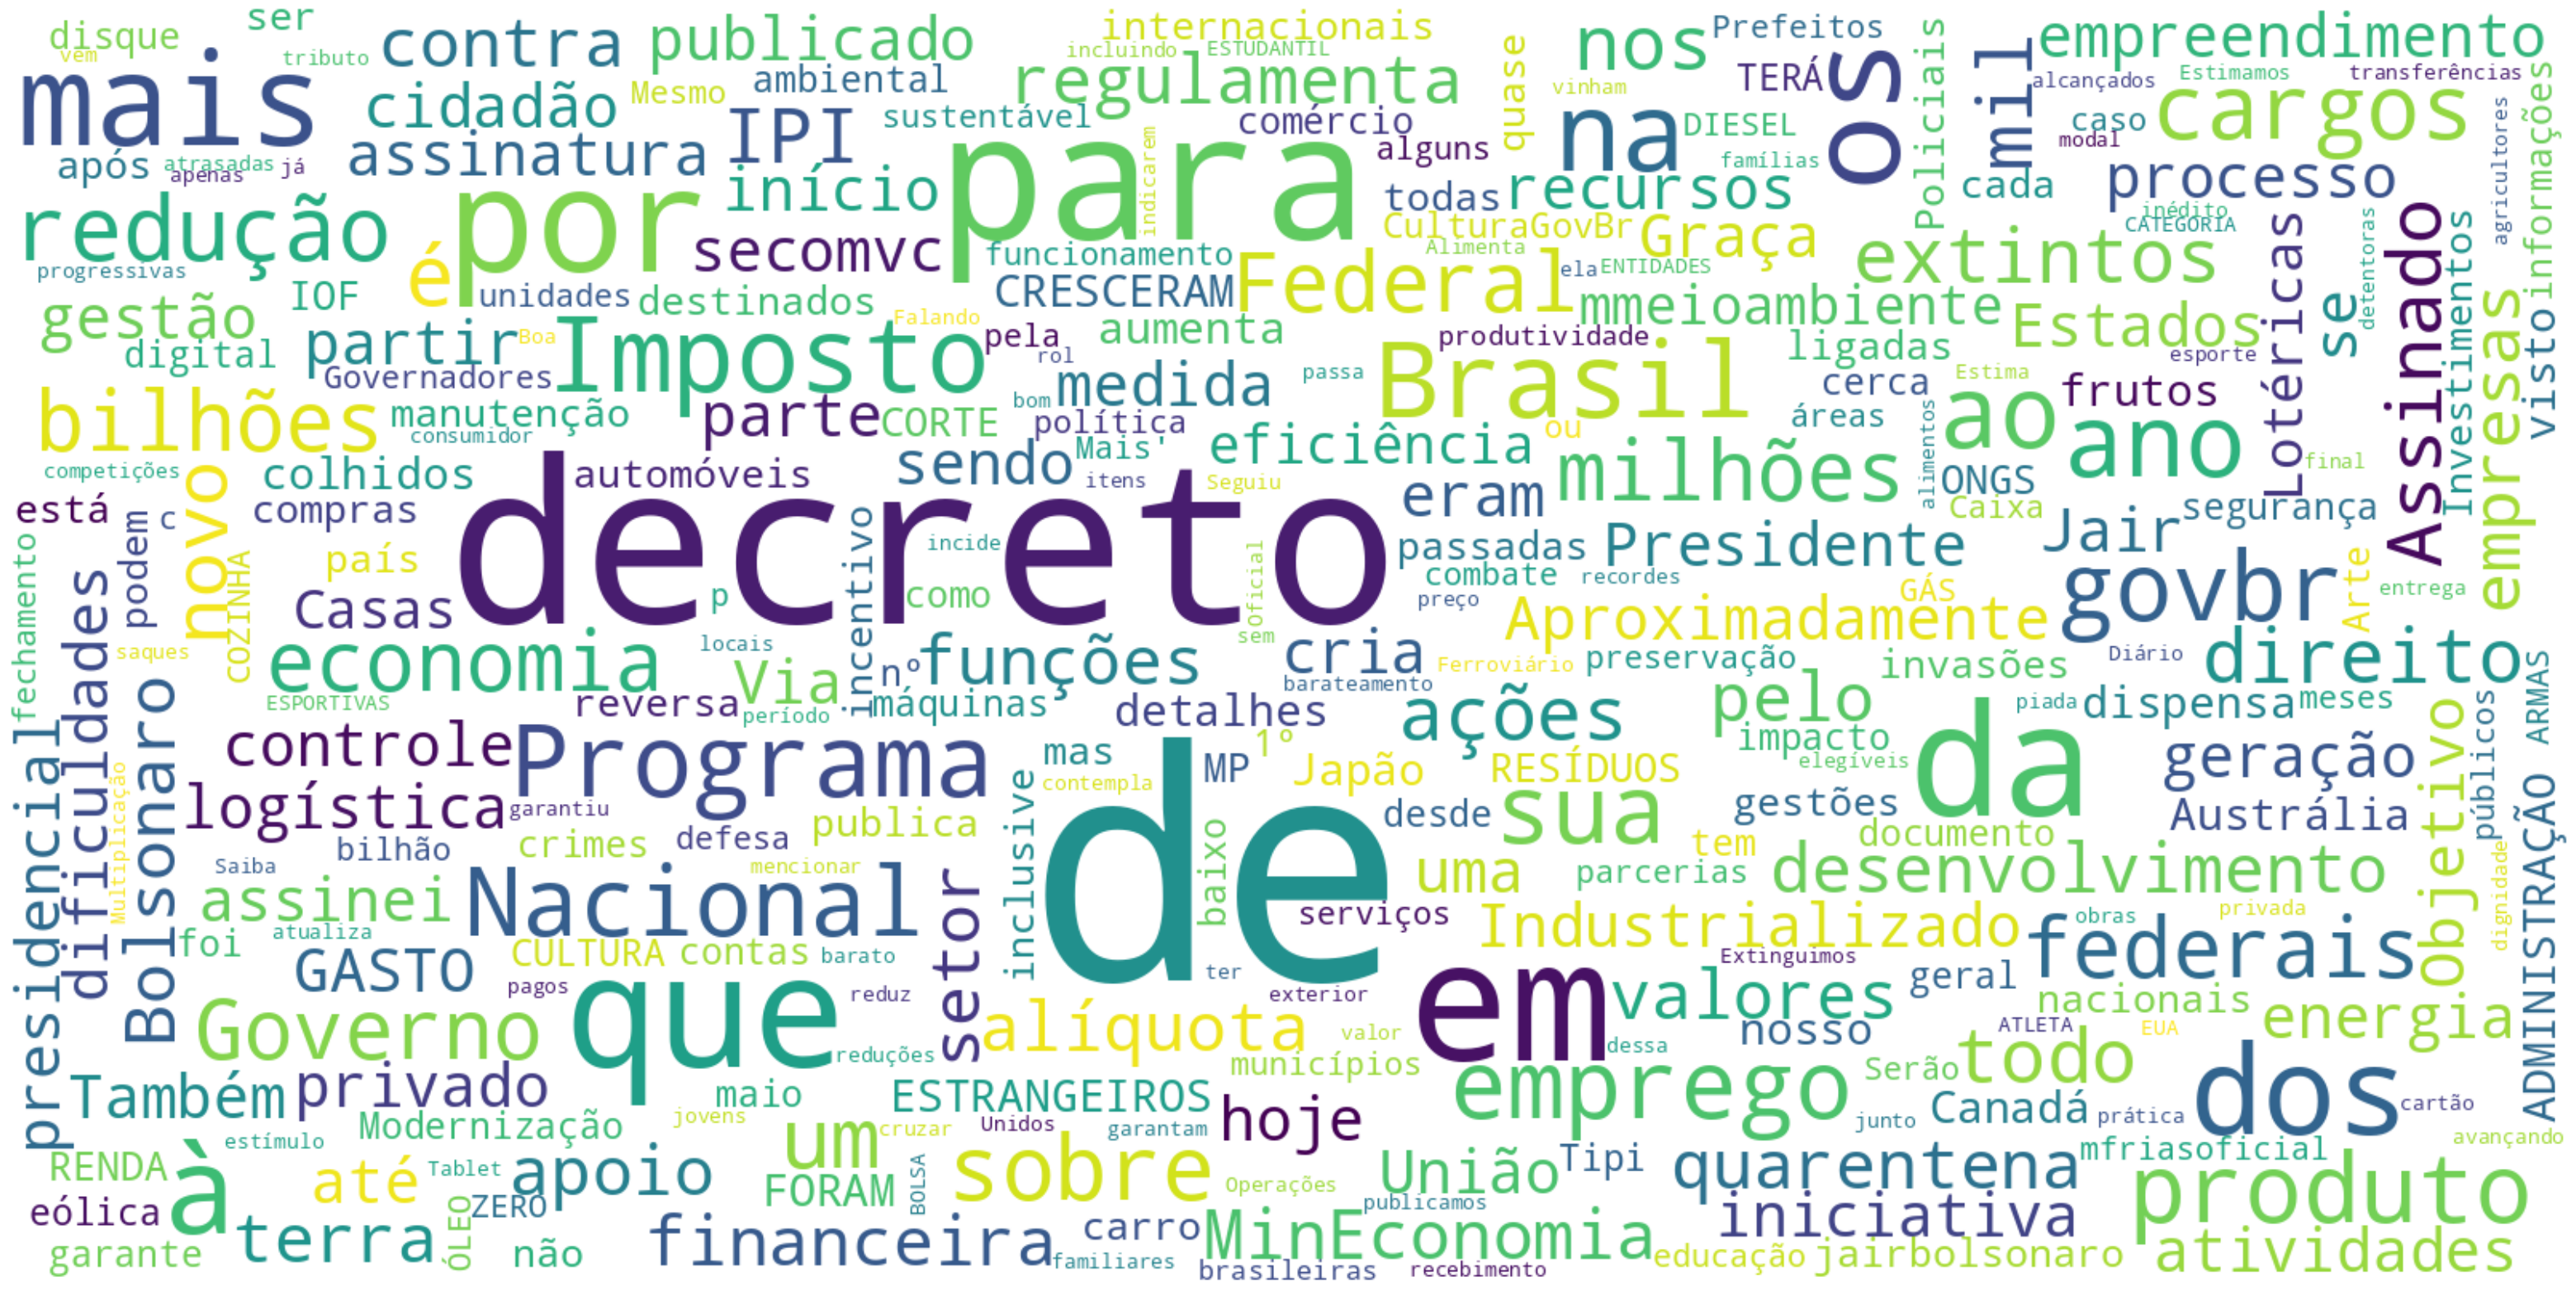

In [14]:
# Montar nuvem de palavras

df_nuvem = politicos_df

# Retira os links das postagens e trata os textos
df_nuvem['cleanText'] = politicos_df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
string = pd.Series(df_nuvem['cleanText'].values).str.cat(sep=' ')

# Retira os caracteres especiais"
caracteres = "#@\n"
for i in range(len(caracteres)):
  string = string.replace(caracteres[i],"")

stopwords = set(STOPWORDS)

# Caso precise remover alguma palavra
stopwords.update(["e", "o"])



wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=300,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [10]:
# Executar uma vez

# determining the name of the file
file_name = 'politics_1.xlsx'


# saving the excel
politicos_df.to_excel(file_name, encoding='utf-8')
print('Dataframe salvo em Excel')


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


Dataframe salvo em Excel
